# 1. Apply K means clustering to credit card dataset: CC.csv

### Importing libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

### Mounting the drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [48]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Python Deep Learning/Assignment 3/Part 2/CC.csv')
credit_card_data["TENURE"].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

## Remove any null values by the mean

In [49]:
# Remove any null values by the mean
cc_data = credit_card_data.fillna(credit_card_data.mean())

# Check if there are any null values
print(sum(cc_data.isnull().sum() != 0))

0


In [50]:
y = np.log(cc_data.TENURE)
X = cc_data.drop(['TENURE', 'CUST_ID'], axis=1)
print(cc_data["TENURE"].value_counts())

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64


## Use the elbow method to find a good number of clusters with the k-Means algorithm

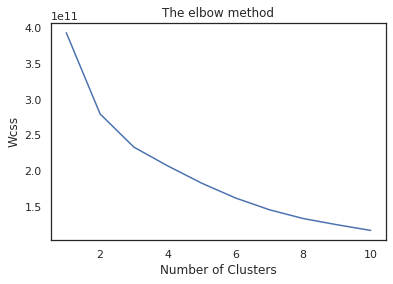

Elbow point:  3


In [64]:
# Get wcss values
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# The elbow method plot
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

#  Identify the elbow point programmatically using kneed function
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print("Elbow point: ", kl.elbow)

## Calculate the silhouette score for the above clustering

In [52]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
print(y_cluster_kmeans)

[0 1 1 ... 0 0 0]


## Silhouette Score for K-means clustering

In [53]:
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Silhouette Score for K-means clustering: ", score)

Silhouette Score for K-means clustering:  0.4660414858969988


# 2. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If yes, can you justify why.

## Perform feature scaling

In [54]:
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

## Find the good cluster value by elbow method on scaled data

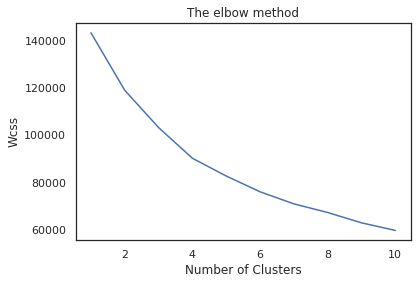

Elbow point:  4


In [55]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=300, random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

#  Identify the elbow point programmatically using kneed function
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print("Elbow point: ", kl.elbow)

## Apply K-means to the scaled data

In [56]:
nclusters = 4 # The value taken from above plot
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)

## Silhouette Score for K-means clustering on the scaled features

In [57]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhouette Score after K-means clustering on the scaled features: ", score)

Silhouette Score after K-means clustering on the scaled features:  0.21672750730006188


## We see that the Silhouette Score is not improved aftre feature scaling because the features scaling were not required for this dataset. We should do feature scaling when the scale of a feature is irrelevant or misleading, and not do it when the scale is meaningful.

# 3. Apply PCA on the same dataset. Apply K-Means algorithm on the PCA result and report your observation if the silhouette score improved or not?

## Apply PCA on the scaled dataset

In [58]:
# Standardizing the features
ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
X_pca = pca.fit_transform(X_scaled)
X_pca_array = pca.transform(X_scaled)

## Apply k-Means 

In [59]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_pca)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)

## Silhouette Score after K-Means algorithm on the PCA result

In [60]:
score = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print("Silhouette Score after K-Means algorithm on the PCA result: ", score)

Silhouette Score after K-Means algorithm on the PCA result:  0.4533204531045519


## We can see that the Silhouette score has improved from 0.2167 to 0.4533 after performing k-Means algorithm on the PCA result.

## Visualization: Scatterplot showing K-means clustering

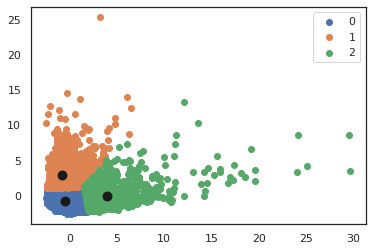

In [61]:
# Predict the labels of clusters.
label = km.fit_predict(X_pca)
 
# Getting unique labels
u_labels = np.unique(label)

# Getting the Centroids
centroids = km.cluster_centers_

# Plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## Visualization: 2 Component PCA Graph

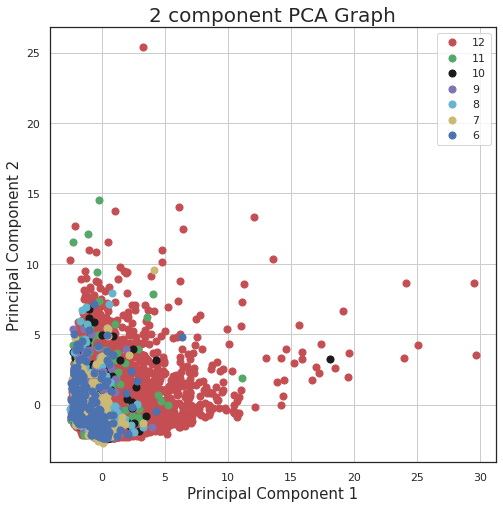

In [62]:
principalDf = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, cc_data[['TENURE']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Graph', fontsize = 20)
targets = [12, 11, 10, 9, 8, 7, 6]
colors = ['r', 'g', 'k', 'm', 'c', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['TENURE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()